# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_current_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    r = requests.get(url, params = payload)
    
    if r.status_code == 200:
        print(f"Processing Record {len(all_cities)} of Set 1 | {city}")
        return r.json()
    else:
        print("City not found. Skipping...")
        return None

In [4]:
all_cities = []
print('''
Beginning Data Retrieval
--------------------------------''')
for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        all_cities.append(result)


Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1 | inirida
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | mul
Processing Record 3 of Set 1 | wajir
Processing Record 4 of Set 1 | jasper
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | mao
Processing Record 7 of Set 1 | los lunas
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | belyy yar
Processing Record 11 of Set 1 | harnosand
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | alta floresta
Processing Record 22 of Set 1 | gerash
Processing Record

In [5]:
all_cities[0]

{'coord': {'lon': -67.92, 'lat': 3.87},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'model',
 'main': {'temp': 300.84,
  'feels_like': 307.5,
  'temp_min': 300.84,
  'temp_max': 300.84,
  'pressure': 1005,
  'humidity': 94,
  'sea_level': 1005,
  'grnd_level': 993},
 'wind': {'speed': 1.17, 'deg': 255},
 'rain': {'3h': 3.81},
 'clouds': {'all': 97},
 'dt': 1577650668,
 'sys': {'country': 'CO', 'sunrise': 1577615791, 'sunset': 1577658627},
 'timezone': -18000,
 'id': 3671450,
 'name': 'Inirida',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame([{
    "City": d["name"],
    "Country": d["sys"].get('country', ''),
    "Date": d["dt"],
    "Latitude": d["coord"].get('lat', ''),
    "Longitude": d["coord"].get('lon', ''),
    "Temp": d["main"]["temp"] - 273.15,
    "Temp Min": d["main"]["temp_min"],
    "Temp Max": d["main"]["temp_max"],
    "Pressure": d["main"]["pressure"],
    "Humidity": d["main"]["humidity"],
    "Clouds": d["clouds"].get("all", ""),
    "Wind Speed": d["wind"].get("speed", "")
} for d in all_cities])

In [7]:
df['Max F'] = (df["Temp Max"] - 273.15) * (9/5) + 32

In [8]:
df.to_csv('all_cities.csv')

In [9]:
df.head()

,City,Country,Date,Latitude,Longitude,Temp,Temp Min,Temp Max,Pressure,Humidity,Clouds,Wind Speed,Max F
0,Inirida,CO,1577650668,3.87,-67.92,27.69,300.84,300.84,1005,94,97,1.17,81.842
1,Yellowknife,CA,1577650515,62.45,-114.38,-25.71,247.15,247.59,1020,75,75,5.70,-14.008
2,Mul,IN,1577650668,20.07,79.68,12.50,285.65,285.65,1015,44,95,1.28,54.500
3,Wajir,KE,1577650668,1.75,40.07,30.28,303.43,303.43,1008,43,100,2.69,86.504
4,Jasper,US,1577650668,33.83,-87.28,20.54,292.04,295.37,1007,100,90,5.62,71.996


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

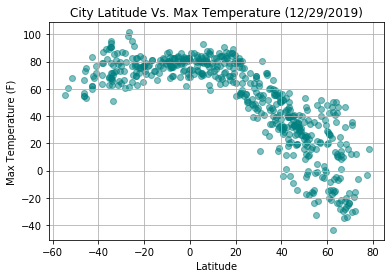

In [10]:
plt.scatter(df["Latitude"], df["Max F"], c = "teal", alpha = 0.5, marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude Vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.grid()
plt.savefig("latitude_vs_maxtemp.png")

plt.show()

#### Latitude vs. Humidity Plot

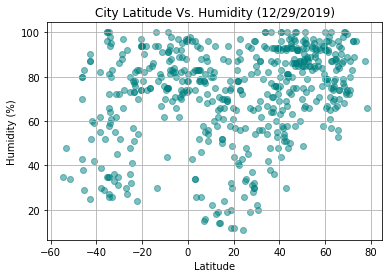

In [11]:
plt.scatter(df["Latitude"], df["Humidity"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("latitude_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

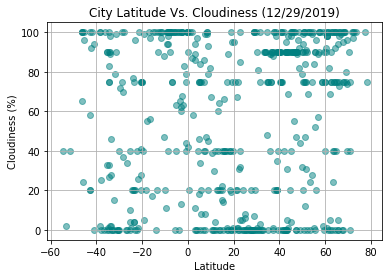

In [12]:
plt.scatter(df["Latitude"], df["Clouds"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("latitude_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

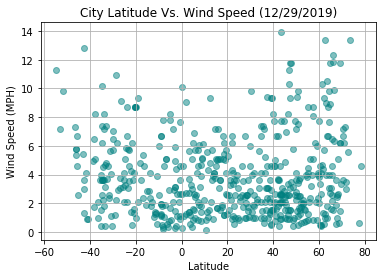

In [13]:
plt.scatter(df["Latitude"], df["Wind Speed"], c = 'teal', alpha = 0.5, marker = 'o')
plt.title(f'City Latitude Vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("latitude_vs_windspeed.png")

plt.show()